# Visualization

# Loding previous file(EDA)

In [47]:
%run EDA.ipynb
transformed_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,OD_NO,QTY,PRICE,OD_LINE_NO,SALES,DATE,STATUS,QTR_ID,PRODUCTLINE,COST,...,ADD2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE,NAME,PROFIT,PROFIT%
0,10107,30,95.70,2,2871.00,2003-02-24,shipped,1,motorcycles,2850,...,897 long airport avenue,nyc,ny,10022,usa,unknown,small,kwai_yu,21.00,21.94
1,10121,34,81.35,5,2765.90,2003-05-07,shipped,2,motorcycles,3230,...,59 rue de l'abbaye,reims,unknown,51100,france,emea,small,paul_henriot,-464.10,-570.50
2,10134,41,94.74,2,3884.34,2003-07-01,shipped,3,motorcycles,3895,...,27 rue du colonel pierre avia,paris,unknown,75508,france,emea,medium,daniel_da cunha,-10.66,-11.25
3,10145,45,83.26,6,3746.70,2003-08-25,shipped,3,motorcycles,4275,...,78934 hillside dr.,pasadena,ca,90003,usa,unknown,medium,julie_young,-528.30,-634.52
4,10159,49,100.00,14,5205.27,2003-10-10,shipped,4,motorcycles,4655,...,7734 strong st.,san francisco,ca,unknown,usa,unknown,medium,julie_brown,550.27,550.27


In [48]:
print(product_data)
print(country_data)
print(city_data)
print(state_data)
print(territory_data)
print(dealsize_data)
print(status_data)

print(yearly_data)
print(monthly_data)
print(day_data)

                     T_sales  T_qty   T_cost   T_profit  T_profit_pct
PRODUCTLINE                                                          
classic cars      3919615.66  33992  4084217 -164601.34         -4.20
motorcycles       1166388.34  11663  1139168   27220.34          2.33
planes             975003.57  10727   952075   22928.57          2.35
ships              714437.13   8127   699304   15133.13          2.12
trains             226243.47   2712   197044   29199.47         12.91
trucks and buses  1127789.84  10777  1110388   17401.84          1.54
vintage cars      1903150.84  21069  1815146   88004.84          4.62
                T_sales  T_qty   T_cost  T_profit  T_profit_pct
COUNTRY                                                        
australia     630623.10   6246   623827   6796.10          1.08
austria       202062.53   1974   208895  -6832.47         -3.38
belgium       108412.62   1074   110791  -2378.38         -2.19
canada        224078.56   2293   226305  -2226.44 

# Line plots for analyzing data

Every date


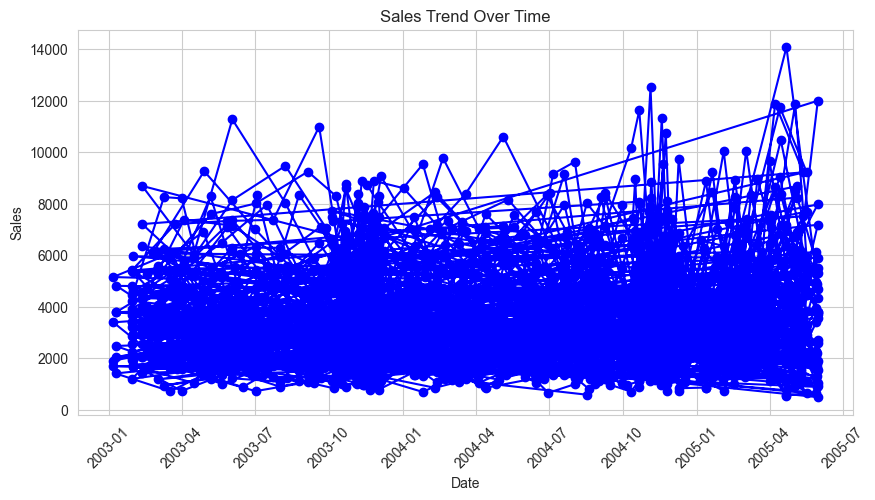

In [49]:
plt.figure(figsize=(10,5))
plt.plot(transformed_data['DATE'], transformed_data['SALES'], marker='o', linestyle='-', color='b')


plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")


# Rotate labels for better readability
# xticks() helps customize x-axis by setting specific tick positions and labels.
# ticks=markings on the axes
plt.xticks(rotation=45)  
plt.show()

Every year by using yearly_data

In [50]:
# plt.figure(figsize=(10,5))
# plt.plot(yearly_data['DATE'], yearly_data['SALES'], marker='o', linestyle='-', color='b')
# plt.plot()
# plt.yticks(np.arange(0,max(yearly_data["SALES"]+1000000), 500000))
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.title("Yearly sales comparison")
# plt.xticks(rotation=45)
# plt.show()

In [51]:
yearly_data

,T_sales,T_qty,T_cost,T_profit,T_profit_pct
DATE,,,,,
2003,3516979.54,34612,3511724,5255.54,0.15
2004,4724162.60,46824,4711281,12881.60,0.27
2005,1791486.71,17631,1774337,17149.71,0.96


pd.Grouper(key='DATE', freq='1YE'):
- allows grouping data based on time based index
- "1M'  '6ME'    'Q' :Quarter     'W' 

In [52]:
six_month_sales =transformed_data.groupby(pd.Grouper(key='DATE', freq='6ME'))[['SALES',"PROFIT","COST"]].sum().reset_index()
six_month_sales

,DATE,SALES,PROFIT,COST
0,2003-01-31,129753.60,150.60,129603
1,2003-07-31,1065438.19,-5817.81,1071256
2,2004-01-31,2638365.17,6157.17,2632208
3,2004-07-31,1610558.08,3068.08,1607490
4,2005-01-31,3136570.52,8365.52,3128205
5,2005-07-31,1451943.29,23363.29,1428580


Directly plotting using matplotlib one by one

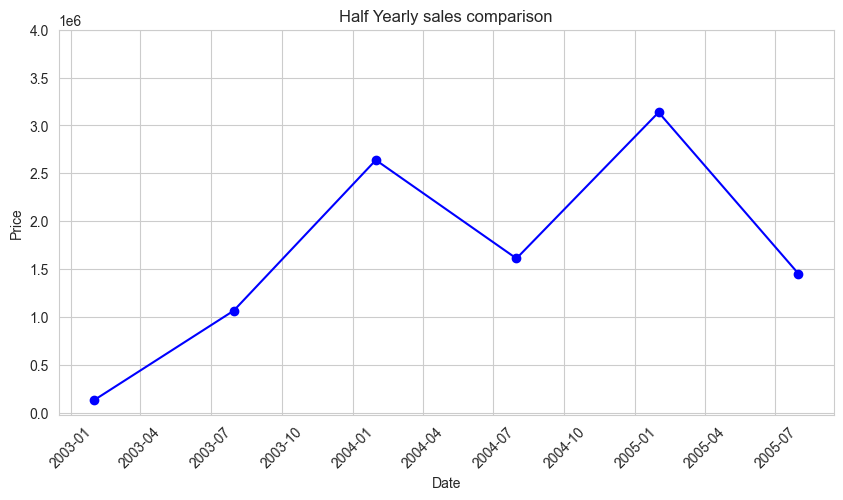

In [53]:
plt.figure(figsize=(10,5))
plt.plot(six_month_sales['DATE'], six_month_sales['SALES'], marker='o', linestyle='-', color='b')
plt.plot()
plt.yticks(np.arange(0,max(six_month_sales["SALES"]+1000000), 500000))
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Half Yearly sales comparison")
plt.xticks(rotation=45)
plt.show()

# Plotting using a function

# bar graph

In [54]:
# Set Seaborn style
sns.set_style("whitegrid")

# Function to create bar plots
def plot_bar(data, x, y, title, xlabel, ylabel, rotation=45, figsize=(18, 6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=data.index, y=data[y], palette="viridis")
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=rotation)
    plt.show()


C:\Users\theka\AppData\Local\Temp\ipykernel_27160\4090295436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[y], palette="viridis")


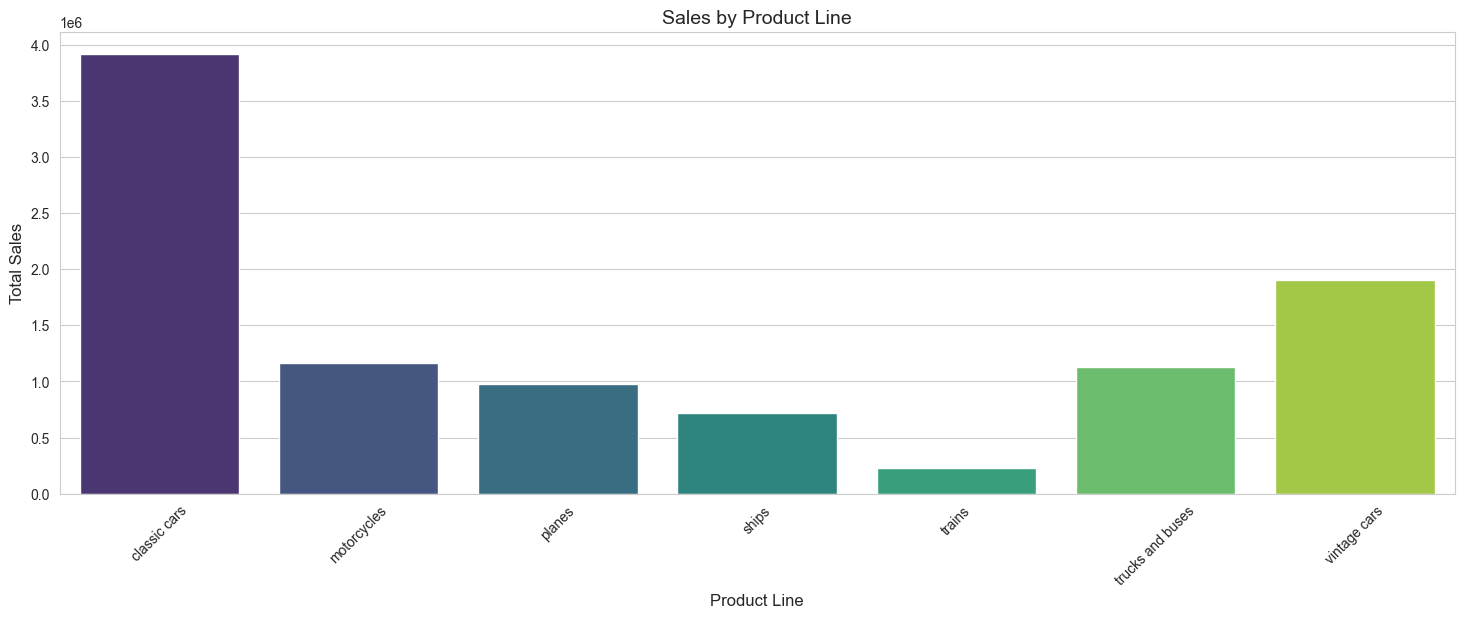

In [55]:

# Product Line Sales Analysis
plot_bar(product_data, x=product_data.index, y="T_sales", title="Sales by Product Line", xlabel="Product Line", ylabel="Total Sales")


C:\Users\theka\AppData\Local\Temp\ipykernel_27160\4090295436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[y], palette="viridis")


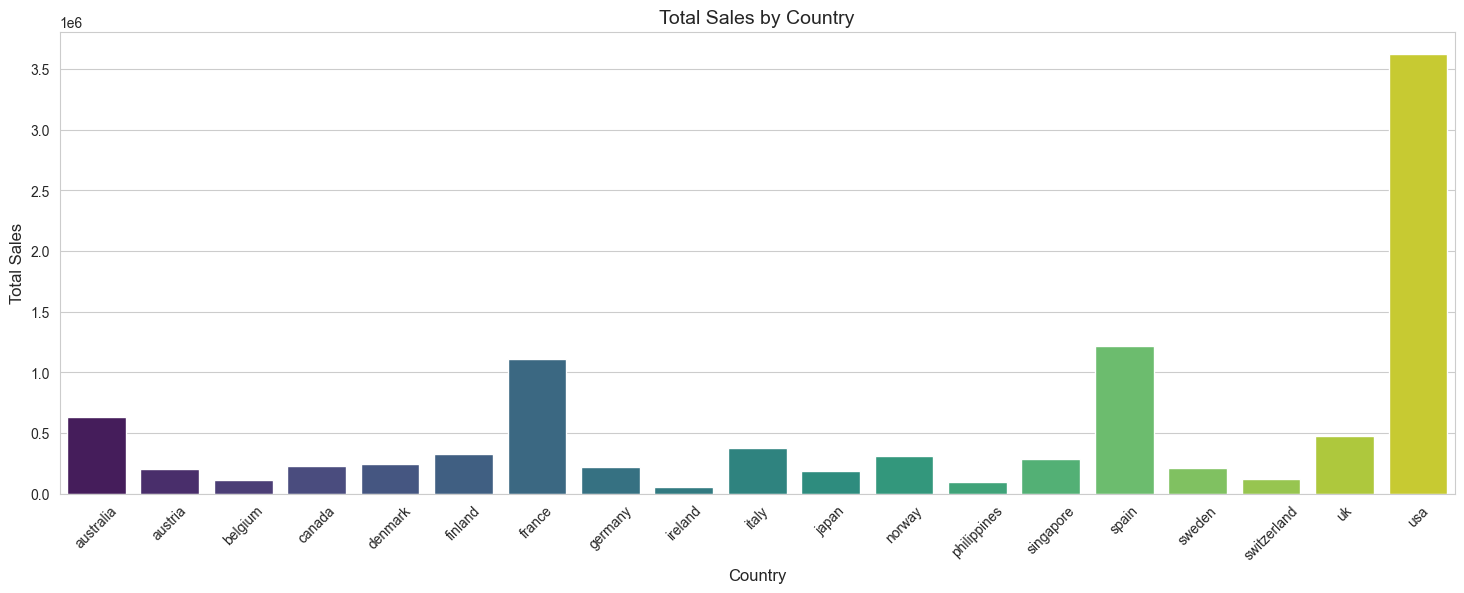

In [56]:

# Country-wise Sales Analysis
plot_bar(country_data, x=country_data.index, y="T_sales", title="Total Sales by Country", xlabel="Country", ylabel="Total Sales")


C:\Users\theka\AppData\Local\Temp\ipykernel_27160\4090295436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[y], palette="viridis")


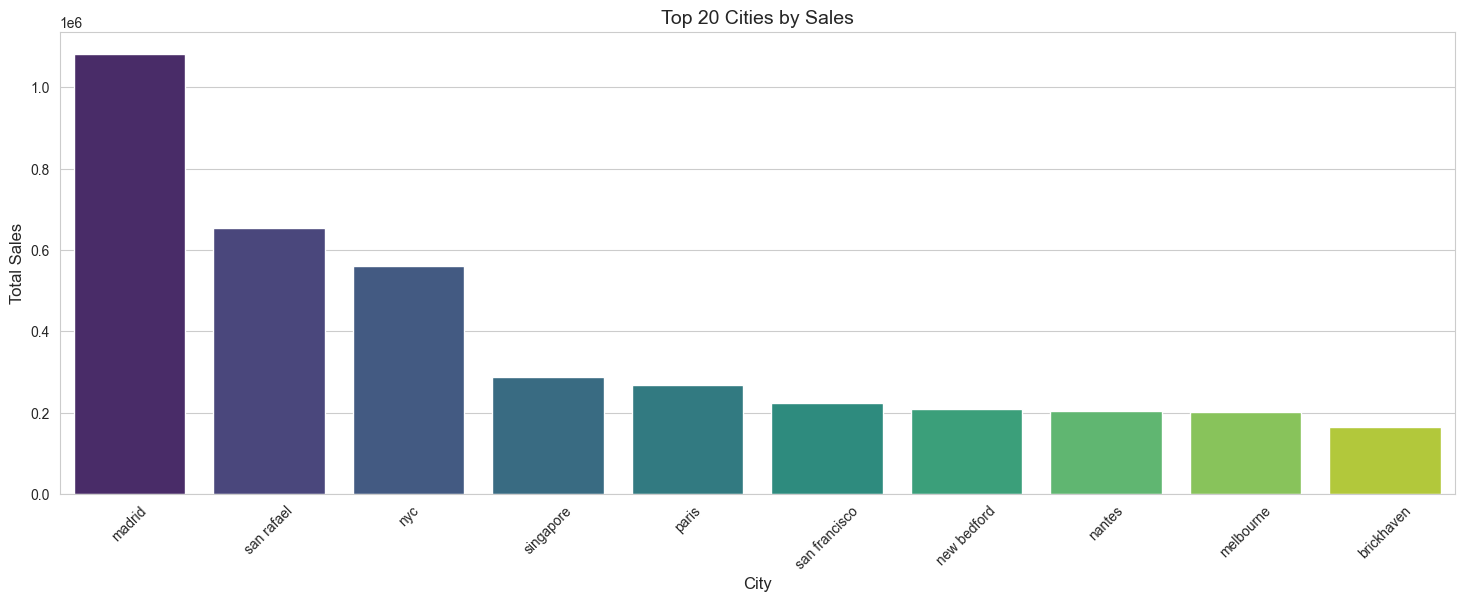

In [57]:

# City-wise Sales Analysis (Top 10 Cities)
plot_bar(city_data.nlargest(10, 'T_sales'), x=city_data.index, y="T_sales", title="Top 20 Cities by Sales", xlabel="City", ylabel="Total Sales")


C:\Users\theka\AppData\Local\Temp\ipykernel_27160\4090295436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[y], palette="viridis")


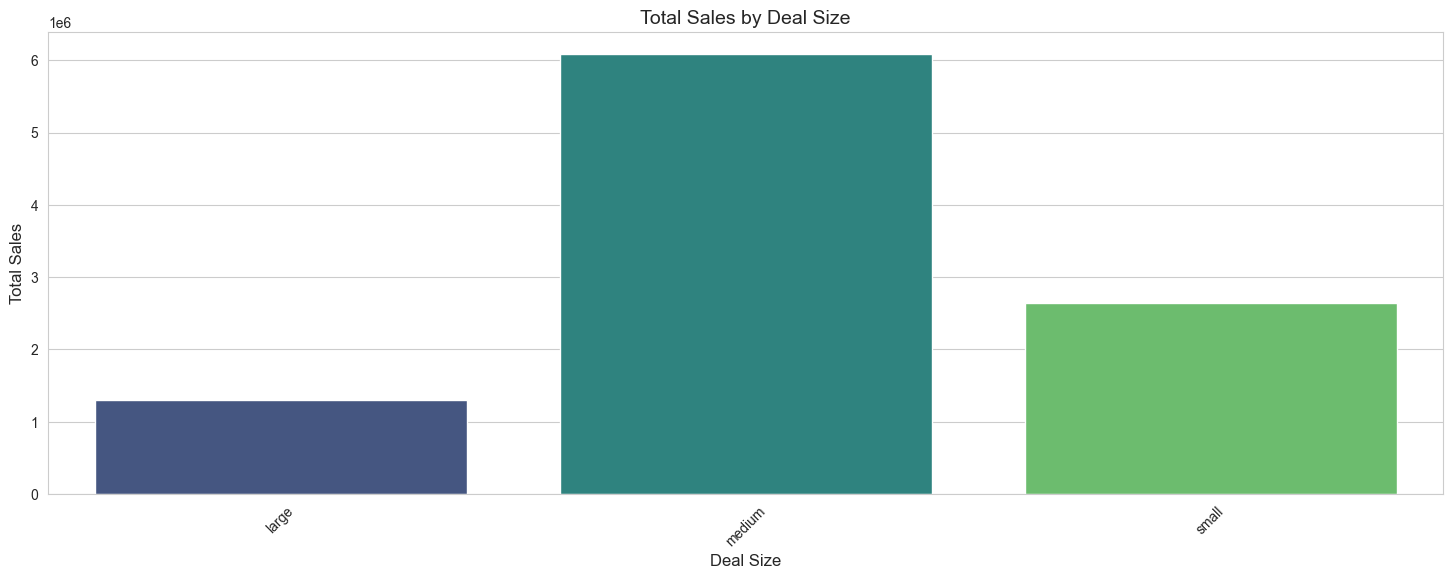

In [58]:

# Deal Size Sales Analysis
plot_bar(dealsize_data, x=dealsize_data.index, y="T_sales", title="Total Sales by Deal Size", xlabel="Deal Size", ylabel="Total Sales")


C:\Users\theka\AppData\Local\Temp\ipykernel_27160\4090295436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[y], palette="viridis")


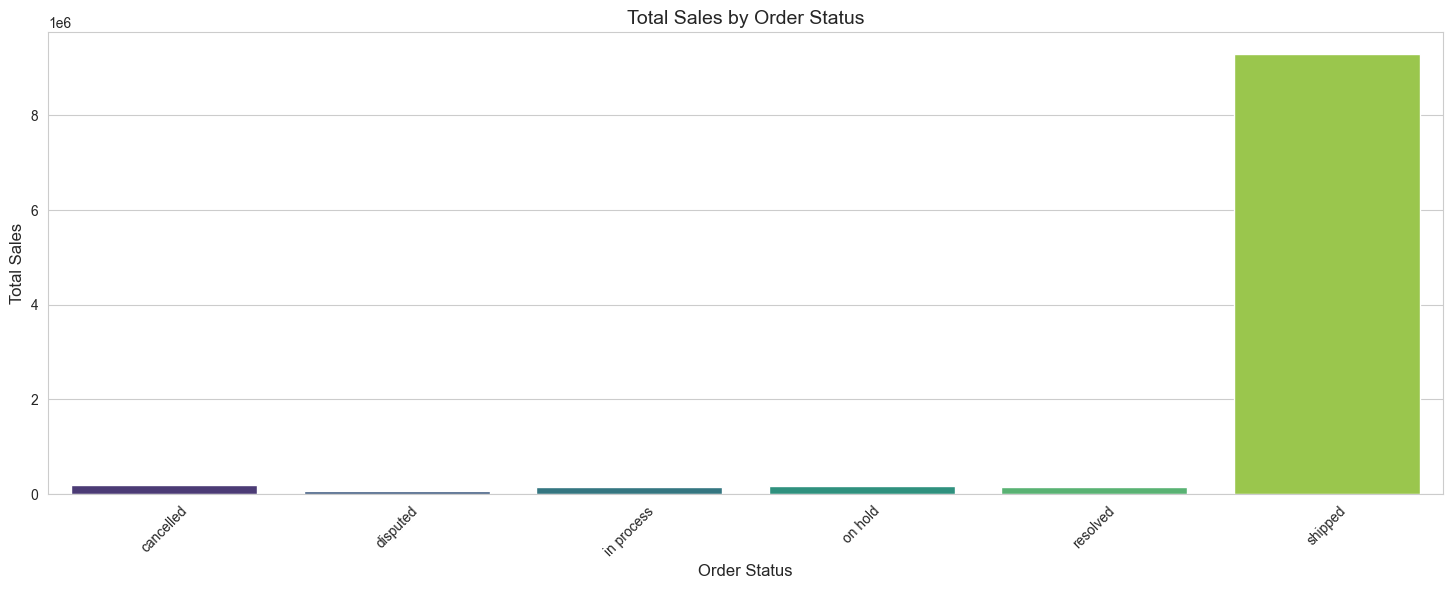

In [59]:

# Status-wise Sales Analysis
plot_bar(status_data, x=status_data.index, y="T_sales", title="Total Sales by Order Status", xlabel="Order Status", ylabel="Total Sales")


# line plots


In [60]:

# Function to create line plots
def plot_line(data, x, y, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.lineplot(x=data.index, y=data[y], marker="o", color="b")
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()


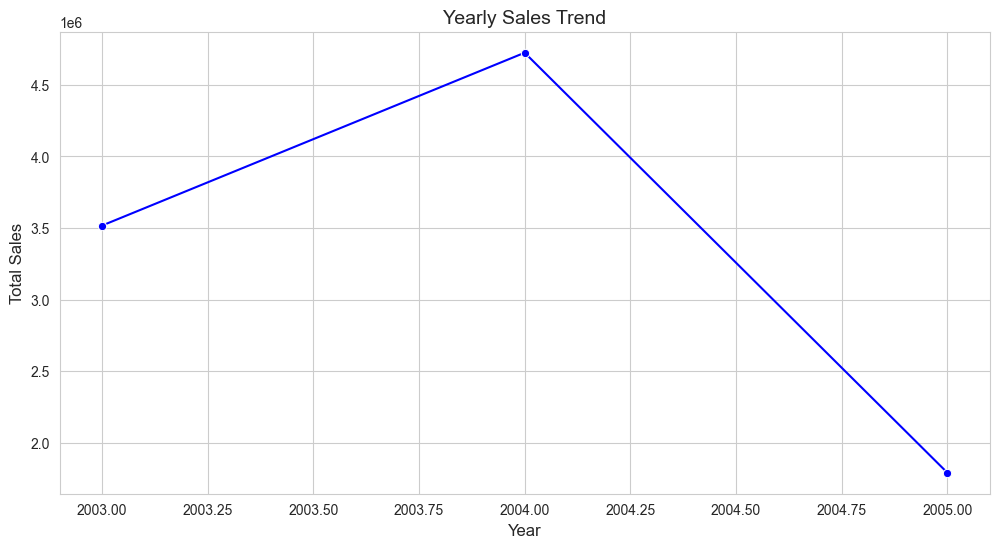

In [61]:

# Yearly Sales Trend
plot_line(yearly_data, x=yearly_data.index, y="T_sales", title="Yearly Sales Trend", xlabel="Year", ylabel="Total Sales")


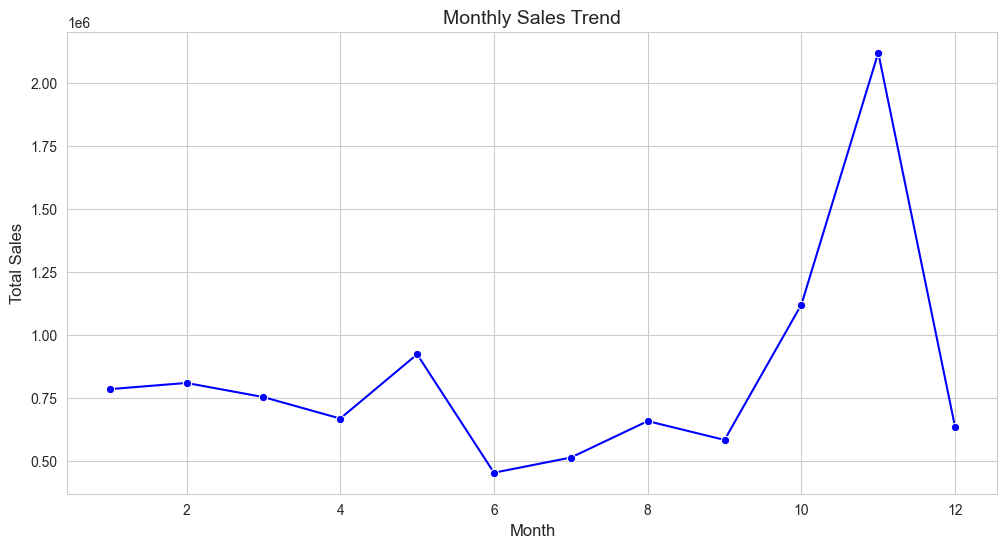

In [62]:

# Monthly Sales Trend
plot_line(monthly_data, x=monthly_data.index, y="T_sales", title="Monthly Sales Trend", xlabel="Month", ylabel="Total Sales")


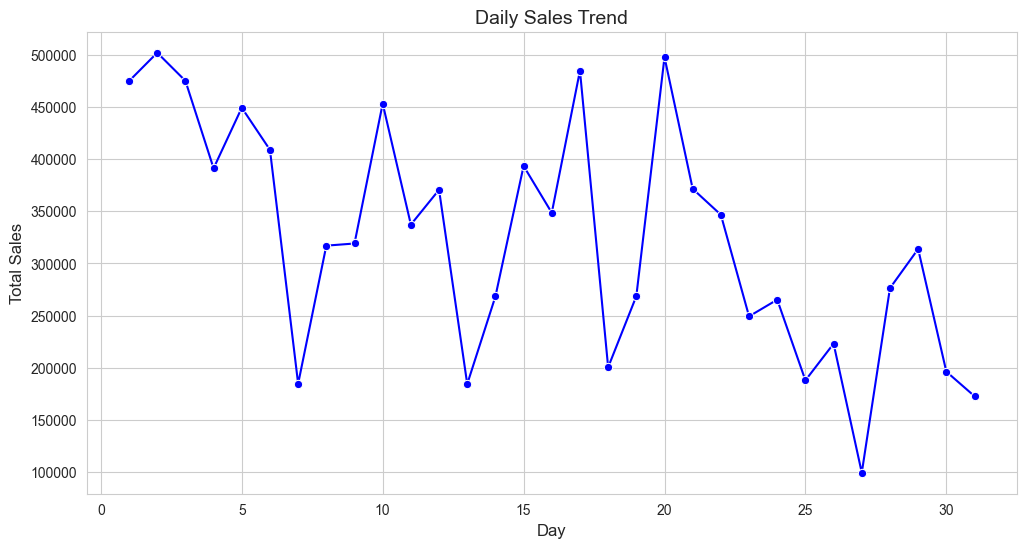

In [40]:

# Daily Sales Trend
plot_line(day_data, x=day_data.index, y="T_sales", title="Daily Sales Trend", xlabel="Day", ylabel="Total Sales")


# histogram and scatter plot


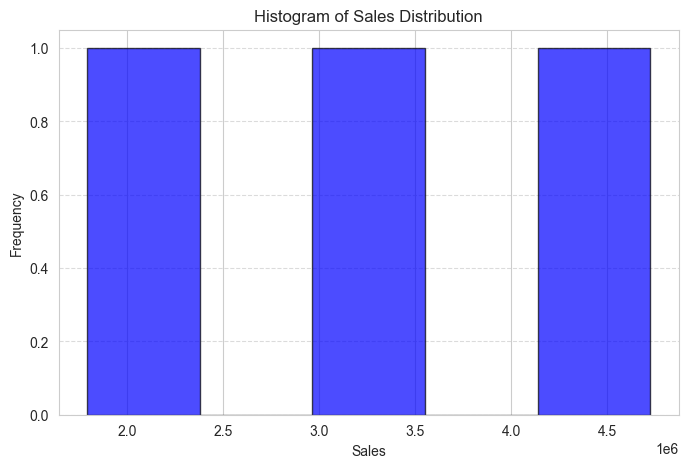

In [65]:
# Histogram of Sales
plt.figure(figsize=(8,5))
plt.hist(yearly_data["T_sales"], bins=5, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Sales Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


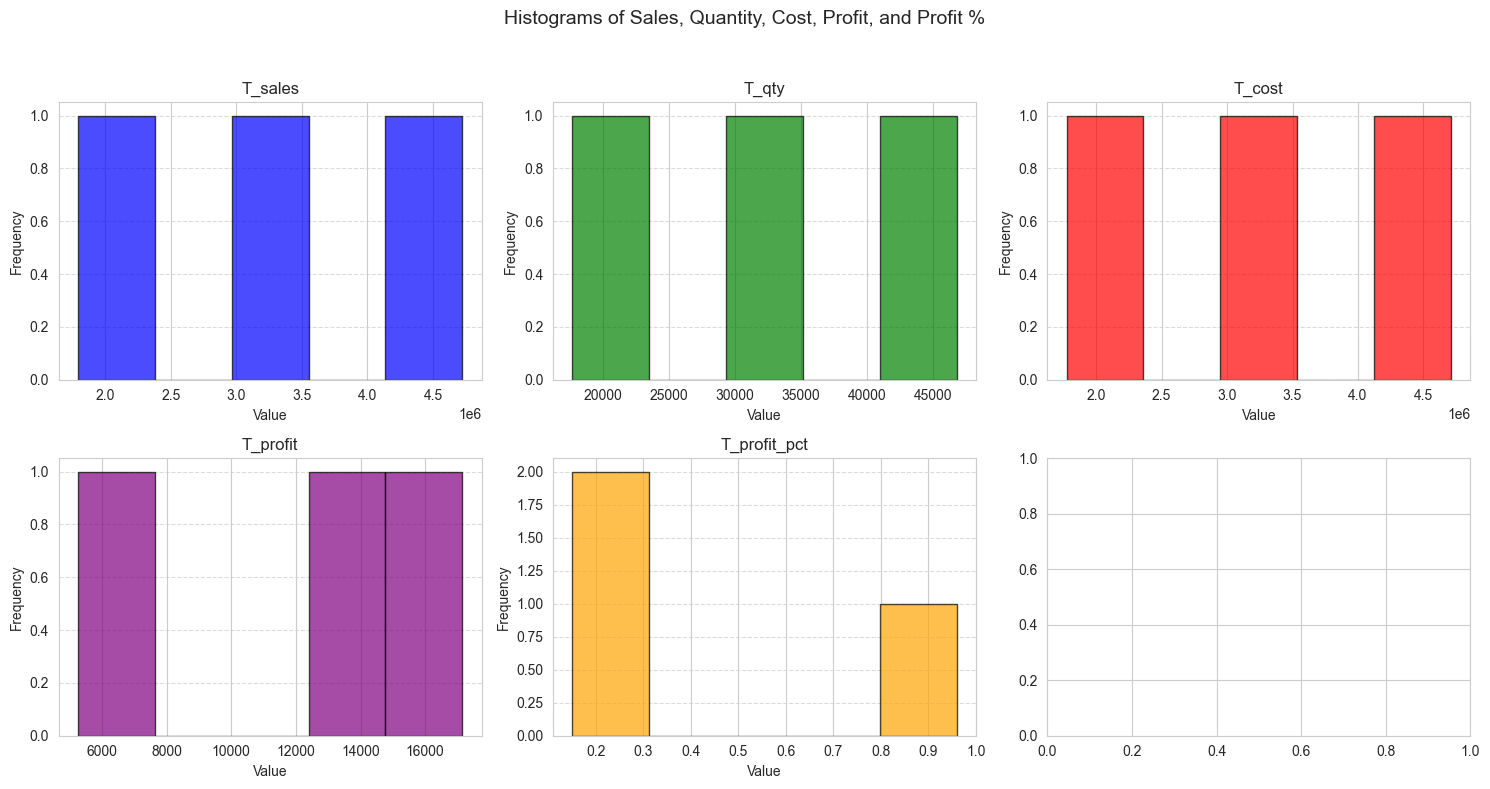

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data
data = {
    "T_sales": [3516979.54, 4724162.60, 1791486.71],
    "T_qty": [34612, 46824, 17631],
    "T_cost": [3511724, 4711281, 1774337],
    "T_profit": [5255.54, 12881.60, 17149.71],
    "T_profit_pct": [0.15, 0.27, 0.96]
}
index = [2003, 2004, 2005]
df = pd.DataFrame(data, index=index)

# Plot Histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Histograms of Sales, Quantity, Cost, Profit, and Profit %", fontsize=14)

columns = ["T_sales", "T_qty", "T_cost", "T_profit", "T_profit_pct"]
colors = ["blue", "green", "red", "purple", "orange"]

for i, col in enumerate(columns):
    ax = axes[i // 3, i % 3]  # Arrange subplots in grid
    ax.hist(df[col], bins=5, color=colors[i], edgecolor="black", alpha=0.7)
    ax.set_title(col)
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Value")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


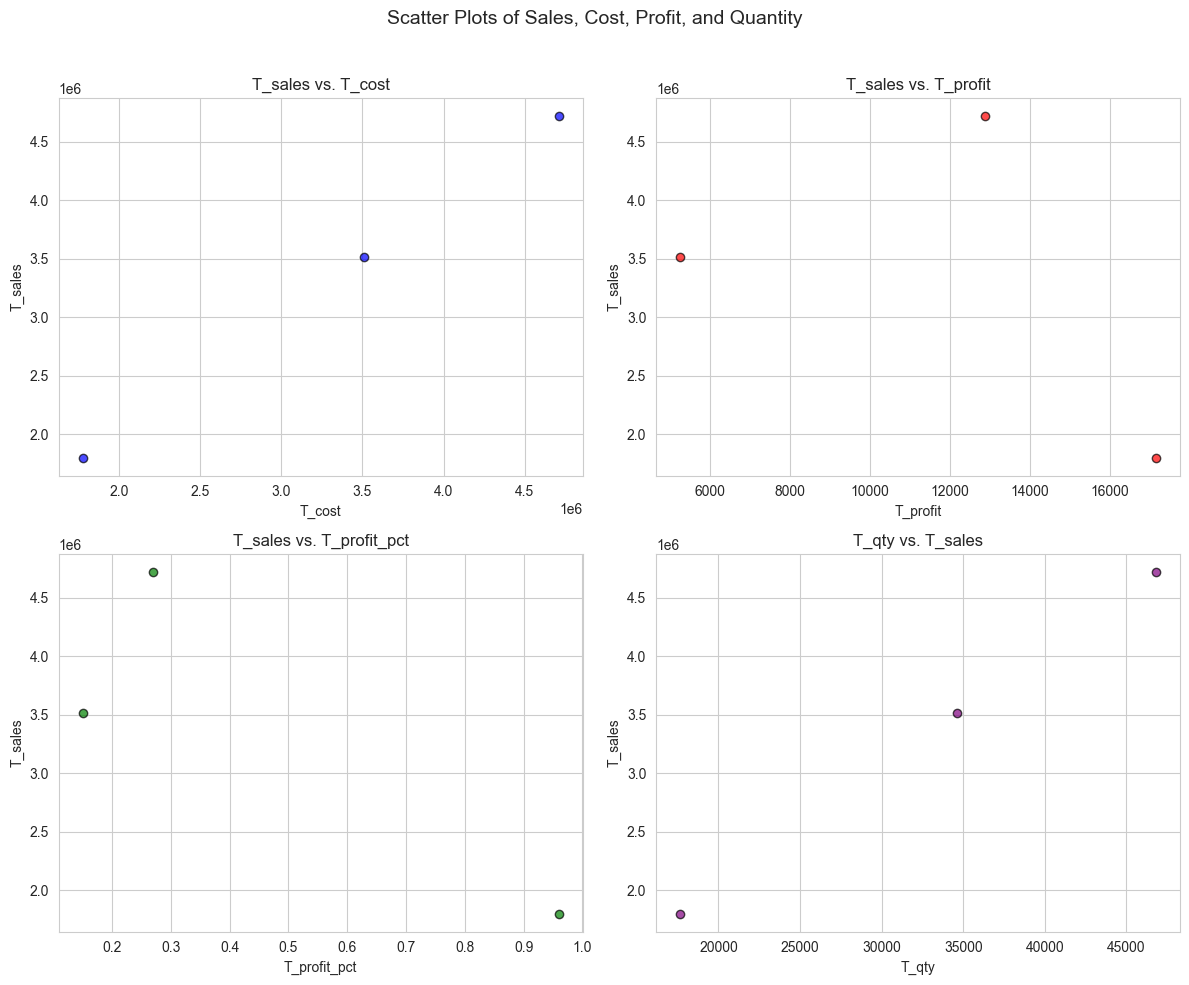

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data
data = {
    "T_sales": [3516979.54, 4724162.60, 1791486.71],
    "T_qty": [34612, 46824, 17631],
    "T_cost": [3511724, 4711281, 1774337],
    "T_profit": [5255.54, 12881.60, 17149.71],
    "T_profit_pct": [0.15, 0.27, 0.96]
}
index = [2003, 2004, 2005]
df = pd.DataFrame(data, index=index)

# Create Scatter Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Scatter Plots of Sales, Cost, Profit, and Quantity", fontsize=14)

# Scatter Plot 1: Sales vs. Cost
axes[0, 0].scatter(df["T_cost"], df["T_sales"], color='blue', edgecolors='black', alpha=0.7)
axes[0, 0].set_title("T_sales vs. T_cost")
axes[0, 0].set_xlabel("T_cost")
axes[0, 0].set_ylabel("T_sales")

# Scatter Plot 2: Sales vs. Profit
axes[0, 1].scatter(df["T_profit"], df["T_sales"], color='red', edgecolors='black', alpha=0.7)
axes[0, 1].set_title("T_sales vs. T_profit")
axes[0, 1].set_xlabel("T_profit")
axes[0, 1].set_ylabel("T_sales")

# Scatter Plot 3: Sales vs. Profit Percentage
axes[1, 0].scatter(df["T_profit_pct"], df["T_sales"], color='green', edgecolors='black', alpha=0.7)
axes[1, 0].set_title("T_sales vs. T_profit_pct")
axes[1, 0].set_xlabel("T_profit_pct")
axes[1, 0].set_ylabel("T_sales")

# Scatter Plot 4: Quantity vs. Sales
axes[1, 1].scatter(df["T_qty"], df["T_sales"], color='purple', edgecolors='black', alpha=0.7)
axes[1, 1].set_title("T_qty vs. T_sales")
axes[1, 1].set_xlabel("T_qty")
axes[1, 1].set_ylabel("T_sales")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


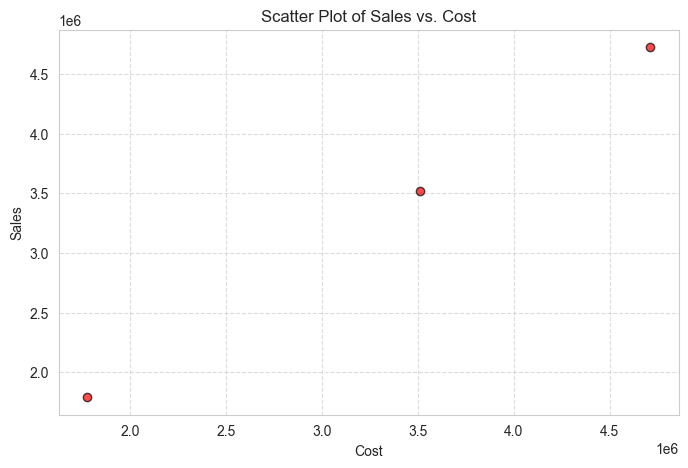

In [67]:
# Scatter Plot: Sales vs. Cost
plt.figure(figsize=(8,5))
plt.scatter(yearly_data["T_cost"], yearly_data["T_sales"], color='red', alpha=0.7, edgecolors='black')
plt.xlabel("Cost")
plt.ylabel("Sales")
plt.title("Scatter Plot of Sales vs. Cost")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


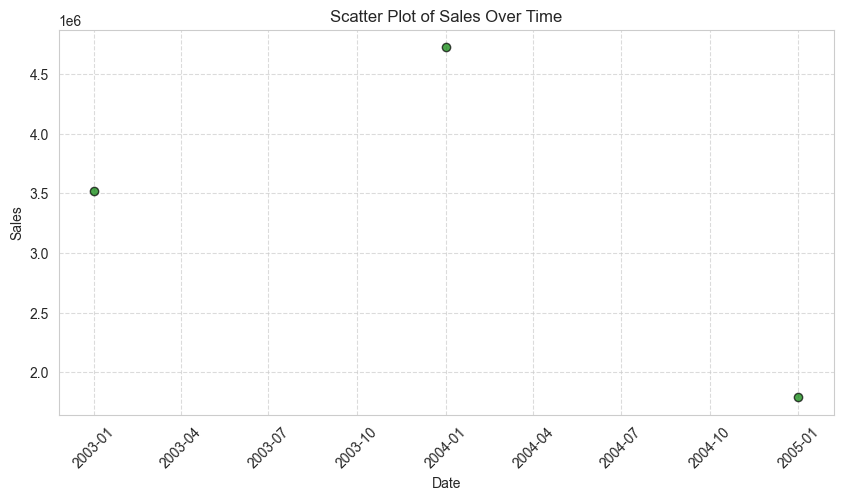

In [71]:
# Reset index to convert DATE from index to column
yearly_data = yearly_data.reset_index()

# Convert DATE to datetime format (optional but helps with proper x-axis handling)
yearly_data["DATE"] = pd.to_datetime(yearly_data["DATE"], format='%Y')

# Scatter Plot: Date vs. Sales
plt.figure(figsize=(10,5))
plt.scatter(yearly_data["DATE"], yearly_data["T_sales"], color='green', alpha=0.7, edgecolors='black')

# Labels and formatting
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Scatter Plot of Sales Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [68]:
# Scatter Plot: Date vs. Sales
plt.figure(figsize=(10,5))
plt.scatter(yearly_data["DATE"], yearly_data["T_sales"], color='green', alpha=0.7, edgecolors='black')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Scatter Plot of Sales Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


KeyError: 'DATE'

<Figure size 1000x500 with 0 Axes>